In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df.shape

(891, 12)

In [31]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [32]:
#now we will drop the columns which are not useful to create a model
df.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1,inplace=True)

In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [34]:
#Now we will conver categorical values into Numbers
sex = pd.get_dummies(df['Sex'],drop_first=True)
embarked = pd.get_dummies(df['Embarked'],drop_first=True)

In [35]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [36]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [37]:
df = pd.concat([df,sex,embarked],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,male,Q,S
0,0,3,male,22.0,1,0,S,1,0,1
1,1,1,female,38.0,1,0,C,0,0,0
2,1,3,female,26.0,0,0,S,0,0,1
3,1,1,female,35.0,1,0,S,0,0,1
4,0,3,male,35.0,0,0,S,1,0,1


In [38]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [39]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


In [40]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
male          0
Q             0
S             0
dtype: int64

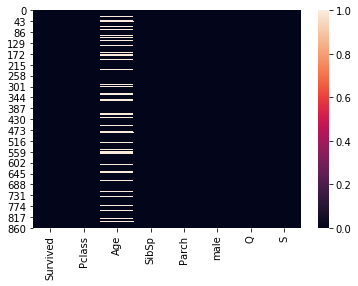

In [42]:
sns.heatmap(df.isnull())

In [50]:
print(df['Age'].mean())
print(df['Age'].min())
print(df['Age'].max())

29.69911764705882
0.42
80.0


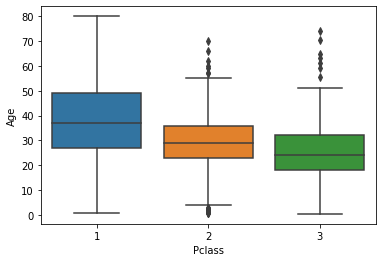

In [51]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [52]:
#after visualising the data we can see that for Pclass 1,2,3 we do have about 37,27,23 mean values
#so we can impute this all values according to everyones Pclass 

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        if Pclass == 2:
            return 27
        
        else:
            return 23
        
    else:
        return Age

In [53]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

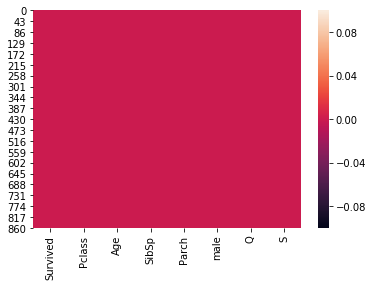

In [54]:
#lets final check for the null values
sns.heatmap(df.isnull())

In [55]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


In [56]:
#lets check for the skewness
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.574241
SibSp       3.695352
Parch       2.749117
male       -0.618921
Q           2.948778
S          -0.997083
dtype: float64

In [61]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [62]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age        -2.046883
SibSp       1.002587
Parch       1.354107
male       -0.618921
Q           2.948778
S          -0.997083
dtype: float64

In [63]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [64]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age        -2.046883
SibSp       0.921187
Parch       1.310184
male       -0.618921
Q           2.948778
S          -0.997083
dtype: float64

In [65]:
#Upto this stage we can see that we already did about 3 times skewed operation but still its not actually scewed
#i will go ahead with the Standard Scaling and see there it works or not

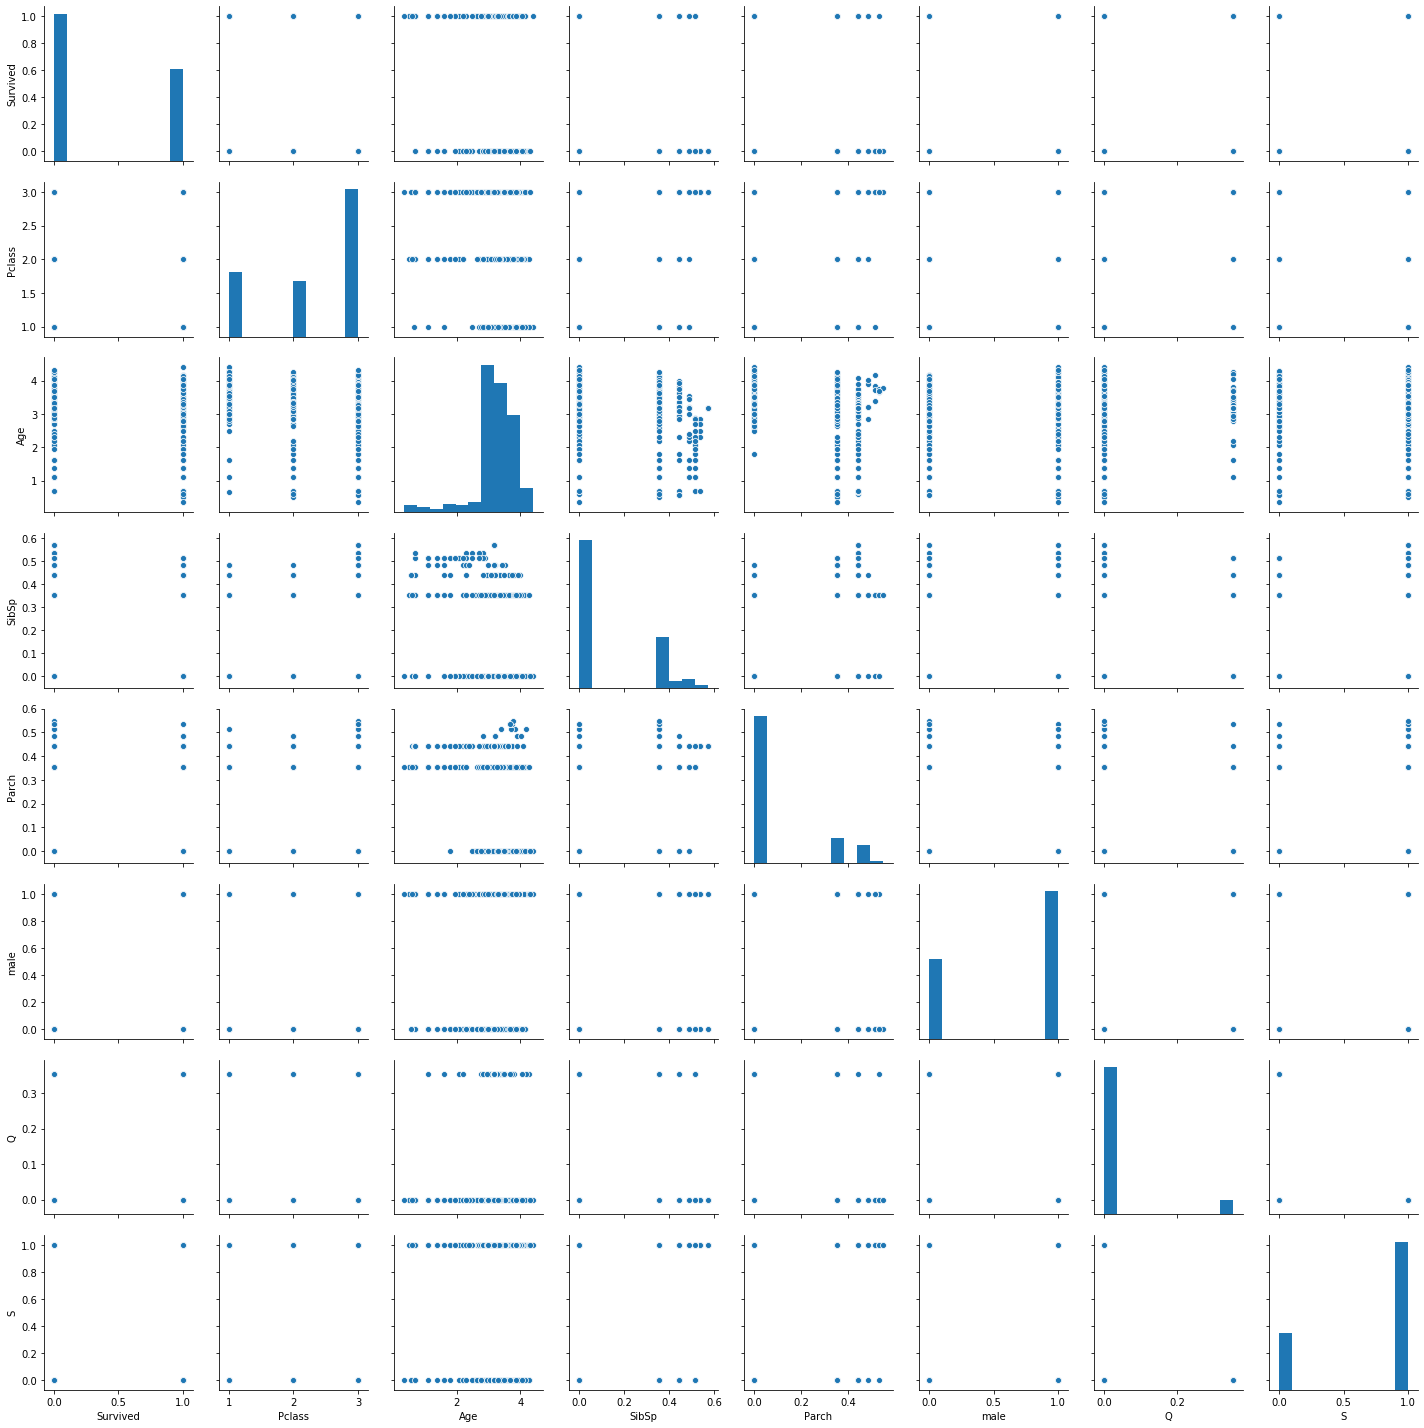

In [66]:
sns.pairplot(df)
plt.show()

In [67]:
#now we will check for the Outliers and remove it for a better results
from scipy.stats import zscore
z_score = abs(zscore(df))
print(df.shape)
df_final = df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(891, 8)
(785, 8)


In [68]:
#lets separate x and y
df_x = df_final.drop(columns=["Survived"],axis=1)
y = df_final[["Survived"]]

In [69]:
#lets do Standar Scaling to scaled a data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [70]:
#lets do final check either our data will have skewness or not
x.skew()

Pclass   -0.484341
Age      -0.981148
SibSp     0.963898
Parch     1.410772
male     -0.682224
Q         0.000000
S        -1.434761
dtype: float64

In [71]:
#lets split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=9,test_size=0.3,stratify=y)

In [72]:
print(x_train.shape,x_test.shape)

(549, 7) (236, 7)


In [73]:
print(y_train.shape,y_test.shape)

(549, 1) (236, 1)


In [74]:
#lets import all models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [75]:
KNN = KNeighborsClassifier(n_neighbors=6)
SV = SVC()
LR = LogisticRegression()
DT = DecisionTreeClassifier(random_state=6)
GNB = GaussianNB()

In [76]:
models = []
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [86]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,auc,roc_curve

In [87]:
from sklearn.model_selection import cross_val_score

*************************** KNeighborsClassifier *******************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy Score 0.8008474576271186


cross_val_score =  0.7991220382992534




D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

roc_auc_curve 0.7559889434889435


classification_report               precision    recall  f1-score   support

           0       0.79      0.93      0.85       148
           1       0.84      0.58      0.68        88

    accuracy                           0.80       236
   macro avg       0.81      0.76      0.77       236
weighted avg       0.81      0.80      0.79       236



[[138  10]
 [ 37  51]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*************************** SVC *******************************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Accuracy Score 0.826271186440678




D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

cross_val_score =  0.8141861408633562


roc_auc_curve 0.7785626535626535


classification_report               precision    recall  f1-score   support

           0       0.80      0.97      0.87       148
           1       0.91      0.59      0.72        88

    accuracy                           0.83       236
   macro avg       0.86      0.78      0.80       236
weighted avg       0.84      0.83      0.82       236



[[143   5]
 [ 36  52]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*************************** LogisticRegression *******************************




D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chan

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score 0.8220338983050848


cross_val_score =  0.8104199123661149


roc_auc_curve 0.7982186732186732


classification_report               precision    recall  f1-score   support

           0       0.84      0.89      0.86       148
           1       0.79      0.70      0.75        88

    accuracy                           0.82       236
   macro avg       0.82      0.80      0.80       236
weighted avg       0.82      0.82      0.82       236



[[132  16]
 [ 26  62]]




D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chan

AxesSubplot(0.125,0.808774;0.62x0.0712264)



*************************** DecisionTreeClassifier *******************************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=6, splitter='best')


Accuracy Score 0.7669491525423728


cross_val_score =  0.7914776046738071


roc_auc_curve 0.7335687960687961


classification_report               precision    recall  f1-score   support

           0       0.79      0.86      0.82       148
           1       0.73      0.60      0.66        88

    accuracy                           0.77       236
   macro avg       0.76      0.73      0.74       236
weighted avg       0.76      0.77      0.76       236



[[1

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

cross_val_score =  0.7811416747809152


roc_auc_curve 0.773495085995086


classification_report               precision    recall  f1-score   support

           0       0.83      0.83      0.83       148
           1       0.72      0.72      0.72        88

    accuracy                           0.79       236
   macro avg       0.77      0.77      0.77       236
weighted avg       0.79      0.79      0.79       236



[[123  25]
 [ 25  63]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





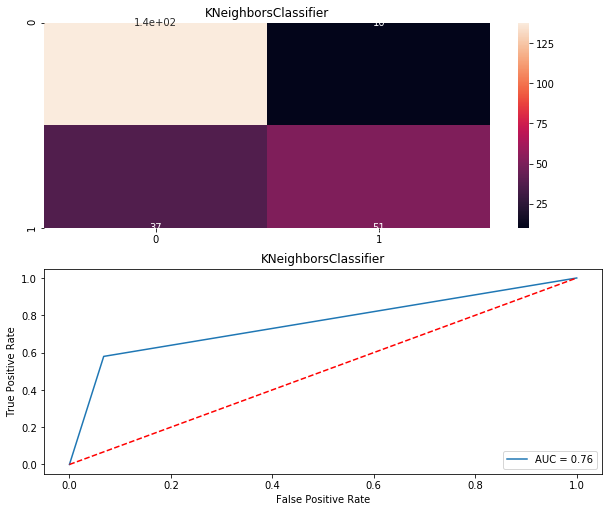

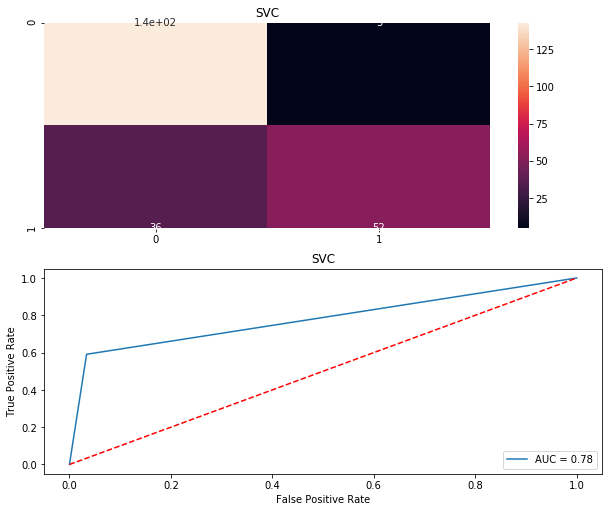

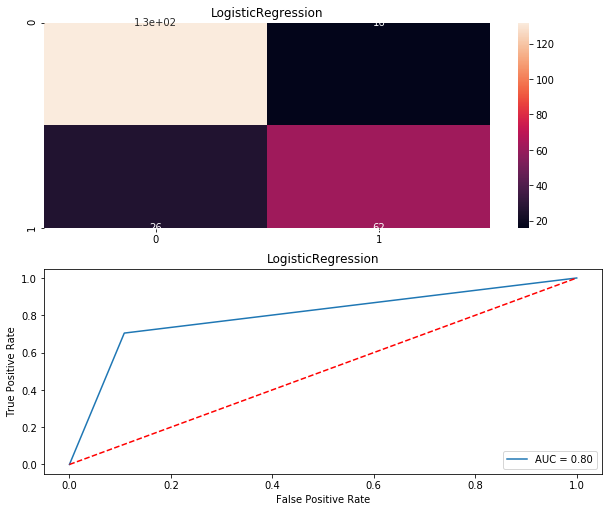

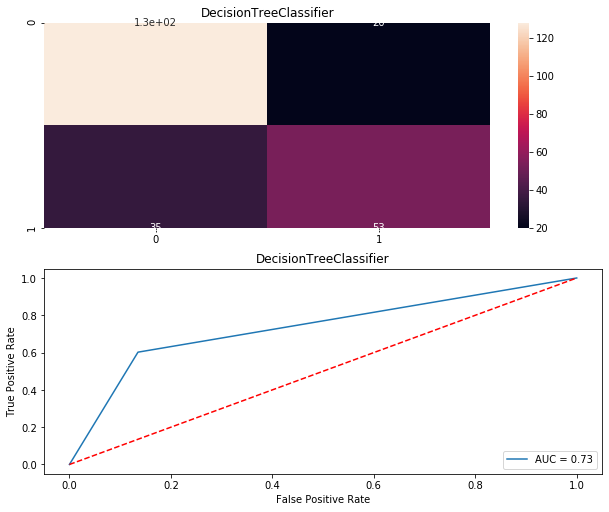

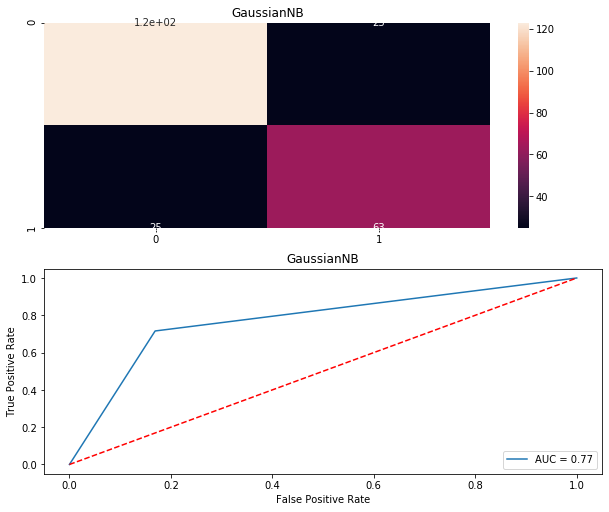

In [88]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('***************************',name,'*******************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre = model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print('Accuracy Score',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('cross_val_score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print('roc_auc_curve',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report',classification_report(y_test,pre))
    print('\n')
    cm = confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label = 'AUC = %0.2f' %roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print('\n\n')
    

In [89]:
result = pd.DataFrame({'Model':Model ,'Accuracy_score':score, 'Cross val Score':cvs ,'Roc auc curve':rocscore})
result

,Model,Accuracy_score,Cross val Score,Roc auc curve
0,KNeighborsClassifier,80.084746,79.912204,75.598894
1,SVC,82.627119,81.418614,77.856265
2,LogisticRegression,82.203390,81.041991,79.821867
3,DecisionTreeClassifier,76.694915,79.147760,73.356880
4,GaussianNB,78.813559,78.114167,77.349509


# I choose "Logistic Regression Model" as it shows nice results on this Dataset 

In [90]:
from sklearn.externals import joblib



D:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [92]:
joblib.dump(LR , 'model_titanictrain.csv')

['model_titanictrain.csv']

In [94]:
model.predict(x_test)

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)